## Purity Calculation

$$ A^{sig+bkg}=u A^{sig}+(1-u)A^{bkg}$$

"where u is the exclusive event purity in the Sig+bkg region"

"purity is calculated by performing a binned fit over the invariant mass range 0.4 - 1.7 GeV and taking the fraction of integrated singal events over the total in the Signal+Background region."

To calculate this purity, we need to fit the invariant hadron mass plot two a function F(M) which is made of two functions F(M)=s(M)+b(M) where s(M) is a gaussian (for example) meant to fit to the signal shape, and b(M) is a polynomial meant to fit to the background shape.


In [1]:
import ROOT
import array

In [2]:
def d_crystalball(x, par):
    t = (x[0] - par[1]) / par[2]
    if t < -par[3]:
        a = ROOT.TMath.Exp(-0.5*par[3]*par[3])
        b = par[3]/par[5]*(par[5]/par[3] - par[3] - t)
        return par[0]*a* ROOT.TMath.Power(b,-par[5])
    elif t > par[4]:
        a = ROOT.TMath.Exp(-0.5*par[4]*par[4])
        b = par[4]/par[6]*(par[6]/par[4] - par[4] + t)
        return par[0]*a* ROOT.TMath.Power(b,-par[6])
    else:
        return par[0] * ROOT.TMath.Exp(-0.5 * t * t)

def polynomial(x,par):
    return par[0] + par[1]*x[0] + par[2]*ROOT.TMath.Power(x[0],2) + par[3]*ROOT.TMath.Power(x[0],3)+ par[4]*ROOT.TMath.Power(x[0],4)

def total_func(x,par):
    par_cb = array.array('d',[par[0],par[1],par[2],par[3],par[4],par[5],par[6]])
    par_pol = array.array('d',[par[7],par[8],par[9],par[10],par[11]])
    fs=d_crystalball(x,array.array('d', par_cb))
    fm=polynomial(x,array.array('d', par_pol))
    return fs + fm

In [15]:
pass2inputFiles = ["out/pippi0_fall2018_in_pass2/pippi0_fall2018_in_pass2.root","out/pippi0_spring2019_in_pass2/pippi0_spring2019_in_pass2.root"]
pass1inputFiles = ["out/pippi0_fall2018_in_pass1/pippi0_fall2018_in_pass1.root","out/pippi0_spring2019_in_pass1/pippi0_spring2019_in_pass1.root"]

In [16]:
chain1 = ROOT.TChain("pippi0")
chain2 = ROOT.TChain("pippi0")
for f in pass1inputFiles:
    chain1.Add(f)
for f in pass2inputFiles:
    chain2.Add(f)

In [5]:
print(chain1.GetEntries())
[b.GetName() for b in chain1.GetListOfBranches()]

40941520


['hel',
 'run',
 'x',
 'eps',
 'gamma',
 'x_true',
 'Q2',
 'Q2_true',
 'z',
 'pT',
 'xF',
 'xF1',
 'xF2',
 'phi',
 'Mx',
 'Mh',
 'z_true',
 'pT_true',
 'xF_true',
 'xF1_true',
 'xF2_true',
 'phi_true',
 'Mx_true',
 'Mh_true',
 'Mdiphoton',
 'Mdiphoton_true',
 'th',
 'th_true',
 'cth',
 'cth_true']

In [ ]:
c = ROOT.TCanvas()#"c","c",800,600)
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

fit = ROOT.TF1("fit","gaussian+pol4(3)",0.4,1.7)
fit.SetLineWidth(4)
fit.SetLineColor(ROOT.kBlack)
fit.SetLineStyle(2)
fit.SetParameters(100,0.8,0.05, 1, 1, 1, 1, 1)

h = ROOT.TH1F("h","Hadron Mass M_{h};M_{h} [GeV];Events",200,0.4,1.7)
h.SetStats(0)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)

ROOT.gPad.SetBottomMargin(0.2)
ROOT.gPad.SetLeftMargin(0.2)


chain1.Draw("Mh>>h","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05 && Mh>0.4 &&Mh<1.7","goff")

h.Fit("fit","R+")

params = [fit.GetParameter(i) for i in range(8)]

gauss = ROOT.TF1("gauss", "gaussian", 0.4, 1.7)
gauss.SetParameters(params[0], params[1], params[2])
gauss.SetLineColor(ROOT.kBlue)

poly4_func = ROOT.TF1("poly4_func", "[0] + [1]*x + [2]*x**2 + [3]*x**3 + [4]*x**4", 0.4, 1.7)
poly4_func.SetParameters(params[3], params[4], params[5], params[6], params[7])
poly4_func.SetLineColor(ROOT.kRed)

leg = ROOT.TLegend(0.65,0.75,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"RGA Inbending Fall","l") #name of object being referred, "title shown", (fit line or point)
leg.AddEntry(gauss,"gaussian fit","l")
leg.AddEntry(poly4_func,"polynomial fit","l")
leg.AddEntry(fit,"total fit","l")
leg.SetBorderSize(0)

h.Draw()
gauss.Draw("SAME")
poly4_func.Draw("SAME")
leg.Draw()
c.Draw()

In [90]:
N = 1
mu = 0.8
sig = 0.06
alphal = 1.57
alphah = 0.9
nl = 1.7
nh = 5
p0 = -0.011
p1 = 0.00624
p2 = 0.8321
p3 = -0.912017
p4 = 0.25
#p0 = -0.2
#p1 = 0.25
#p2 = 0.5
#p3 = -0.75
#p4 = 0.25

pars = [N,mu,sig,alphal,alphah,nl,nh,p0,p1,p2,p3,p4]
pars_labels = ["N","#mu","#sigma","#alpha_{l}","#alpha_{h}","n_{l}","n_{h}","p0","p1","p2","p3","p4"]
total_func([1],array.array('d',pars))

0.27379466453218587

Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


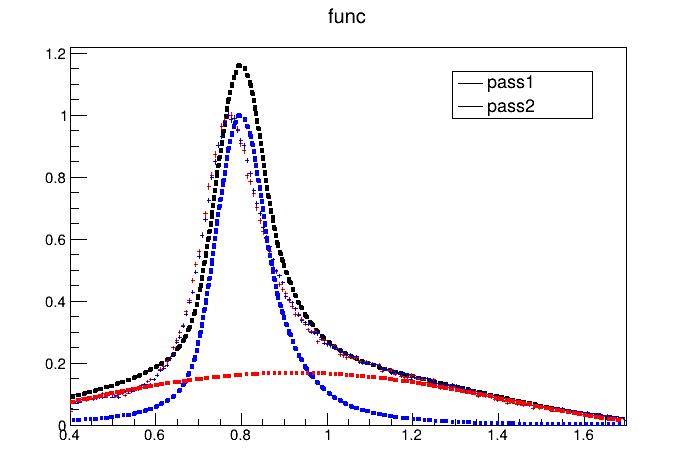

In [56]:
c1 = ROOT.TCanvas()

func = ROOT.TF1("func",total_func,0.4,1.7,12)
func.SetLineWidth(4)
func.SetLineColor(ROOT.kBlack)
func.SetLineStyle(2)
func.SetParameters(array.array('d',pars))

dcb = ROOT.TF1("dcb",d_crystalball,0.4,1.7,12)
dcb.SetLineWidth(4)
dcb.SetLineColor(ROOT.kBlue)
dcb.SetLineStyle(2)
dcb.SetParameters(array.array('d',pars[0:7]))

pol = ROOT.TF1("pol",polynomial,0.4,1.7,12)
pol.SetLineWidth(4)
pol.SetLineColor(ROOT.kRed)
pol.SetLineStyle(2)
pol.SetParameters(array.array('d',pars[7:]))

#func.SetMaximum(1.2)
#func.SetMinimum(-1.2)

h1 = ROOT.TH1F("h1","Hadron Mass M_{h};M_{h} [GeV];Events",200,0.3,1.8)
chain1.Draw("Mh>>h1","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05 && Mh>0.4 &&Mh<1.7","goff")
h2 = ROOT.TH1F("h2","Hadron Mass M_{h};M_{h} [GeV];Events",200,0.3,1.8)
chain2.Draw("Mh>>h2","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05 && Mh>0.4 &&Mh<1.7","goff")
maxbin = h1.GetMaximumBin()
maxcount = h1.GetBinContent(maxbin)
h1.Scale(1/maxcount)
maxbin = h2.GetMaximumBin()
maxcount = h2.GetBinContent(maxbin)
h2.Scale(1/maxcount)
h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)

leg = ROOT.TLegend(0.65,0.75,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry("h1","pass1","l")
leg.AddEntry("h2","pass2","l")

func.Draw()
leg.Draw()
h1.Draw("SAME")
h2.Draw("SAME")
dcb.Draw("SAME")
pol.Draw("SAME")
c1.Draw()

In [63]:
fit = ROOT.TF1("fit",total_func,0.4,1.7,12)
fit.SetLineWidth(4)
fit.SetLineColor(ROOT.kBlack)
fit.SetLineStyle(2)
fit.SetParameters(array.array('d',pars))
fit.SetParLimits(0,0,1.5) #N
fit.SetParLimits(1,0.6,1) #mu
fit.SetParLimits(5,0,10) #nl
fit.SetParLimits(6,0,10) #nh
fit.SetParLimits(7,-1,1) #p0
fit.SetParLimits(8,-1,1) #p1
fit.SetParLimits(9,-1,1) #p2
fit.SetParLimits(10,-1,1) #p3
fit.SetParLimits(11,-1,1) #p4


h = ROOT.TH1F("h","Hadron Mass M_{h};M_{h} [GeV];Events",200,0.3,1.8)
h.SetStats(0)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)

ROOT.gPad.SetBottomMargin(0.2)
ROOT.gPad.SetLeftMargin(0.2)


chain1.Draw("Mh>>h","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05 && Mh>0.4 &&Mh<1.7","goff")

#normalize histogram for better fitting
maxbin = h.GetMaximumBin()
maxcount = h.GetBinContent(maxbin)
h.Scale(1/maxcount)

ROOT.Math.MinimizerOptions.SetDefaultMaxFunctionCalls(5000)

print("Fitting Function...")
fit_result = h.Fit("fit","SR")

params = [fit.GetParameter(i) for i in range(12)]



Fitting Function...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      638.267
NDf                       =          162
Edm                       =  7.88402e-06
NCalls                    =         1426
p0                        =     0.843694   +/-   0.00343806   	 (limited)
p1                        =     0.774301   +/-   0.000408643  	 (limited)
p2                        =    0.0645184   +/-   0.000477025 
p3                        =      1.61413   +/-   0.0367209   
p4                        =     0.755647   +/-   0.0157406   
p5                        =      9.99998   +/-   0.525181     	 (limited)
p6                        =      3.94412   +/-   0.402334     	 (limited)
p7                        =   -0.0109114   +/-   0.00157839   	 (limited)
p8                        =   -0.0138802   +/-   0.00215657   	 (limited)
p9                        =     0.824231   +/-   0.00123751   	 (limited)
p10                       =    -0.910006 

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


COV MATRIX STATUS = 3
0.0013121245328054222 0.9859023599125483


Warning in <TROOT::Append>: Replacing existing TH1: frame (Potential memory leak).


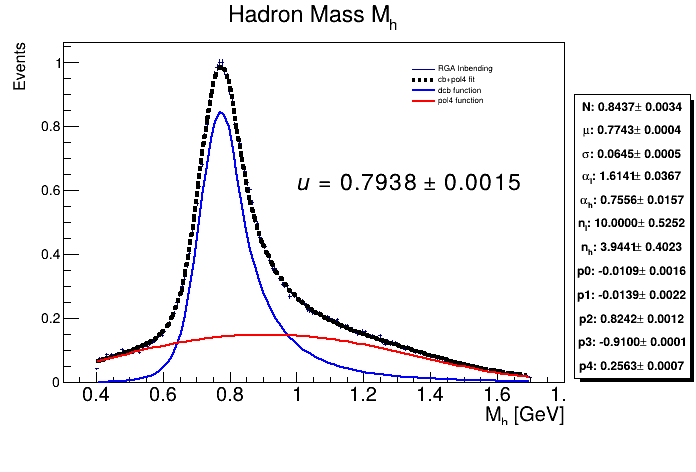

In [102]:
c2 = ROOT.TCanvas()#"c","c",800,600)
c2.SetTickx()
c2.SetTicky()
c2.SetGridx()
c2.SetGridy()
c2.Divide(2,1)

cb_func = ROOT.TF1("cb_func",d_crystalball,0.4,1.7,7)
cb_func.SetParameters(params[0],params[1],params[2],params[3],params[4],params[5],params[6])
cb_func.SetLineColor(ROOT.kBlue)

pol4_func = ROOT.TF1("pol4_func",polynomial,0.4,1.7,5)
pol4_func.SetParameters(params[7],params[8],params[9],params[10],params[11])
pol4_func.SetLineColor(ROOT.kRed)

#now need to integrate the total_func "fit" over the sig+bkg region and divide by the dcb function integrated over the same region
# note: need to divide the integral by the bin width in order to compare the what the integral of the histogram would be since the function is continueous while the histogram is not
BinWidth = h.GetBinWidth(1)
denom = fit.Integral(0.65,0.9)/BinWidth
num = cb_func.Integral(0.65,0.9)/BinWidth

print(f"COV MATRIX STATUS = {fit_result.CovMatrixStatus()}") 
cov_matrix = fit_result.GetCovarianceMatrix()
if fit_result.CovMatrixStatus() != 3:
    print("\033[91mPurity Fit Covariant Matrix Inaccurate...setting errors to 0\033[0m")
    denom_err = 0
    num_err = 0
else:
    denom_err = fit.IntegralError(0.65,0.9,fit_result.GetParams(),cov_matrix.GetMatrixArray())/BinWidth
    num_err = cb_func.IntegralError(0.65,0.9,cb_func.GetParameters(),fit_result.GetCovarianceMatrix().GetSub(0,6,0,6).GetMatrixArray())/BinWidth
    
u = num/denom  #integral of sig divided by integral of sig+bkg
u_err = u*ROOT.TMath.Sqrt(ROOT.TMath.Power(num_err/num,2)+ROOT.TMath.Power(denom_err/denom,2))

text=ROOT.TLatex(1,0.6,f"u = {round(u,4)}\pm{round(u_err,4)}")
text.SetTextSize(0.06)
text.SetTextColor(ROOT.kBlack)

leg = ROOT.TLegend(0.65,0.75,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"RGA Inbending","l") #name of object being referred, "title shown", (fit line or point)
leg.AddEntry(fit,"cb+pol4 fit","l")
leg.AddEntry(cb_func,"dcb function","l")
leg.AddEntry(pol4_func,"pol4 function","l")
leg.SetBorderSize(0)

xaxis = cb_func.GetXaxis()
xmin = xaxis.GetXmin()-0.02
xmax = xaxis.GetXmax()+0.02
ymin = min(cb_func.GetMinimum(),fit.GetMinimum(),pol4_func.GetMinimum())
ymax = max(cb_func.GetMaximum(),fit.GetMaximum(),pol4_func.GetMaximum())
print(ymin,ymax)
frame = ROOT.TH1F("frame", "", 100, xmin, xmax)
frame.SetMinimum(ymin*0.9)
frame.SetMaximum(ymax*1.1)
frame.SetTitle("test")
frame.GetXaxis().SetTitle("M_h")
frame.GetYaxis().SetTitle("Counts")
frame.SetStats(0)

#frame.Draw()
pad1 = c2.cd(1)
pad1.SetPad(0.0,0.1,0.9,1.0)
pad1 = c2.cd(2)
pad1.SetPad(0.815,0.0,1.0,1.0)

c2.cd(1)
h.Draw()
fit.Draw("SAME")
cb_func.Draw("SAME")
pol4_func.Draw("SAME")
leg.Draw()
text.Draw()

#draw paramaters on side panel
c2.cd(2)

param_box = ROOT.TPaveText(0.05, 0.2, 0.95, 0.8, "NDC")
param_box.SetFillColor(0)
param_box.SetTextAlign(22)
param_box.SetTextSize(0.1)
for p in range(fit.GetNpar()):
    name = pars_labels[p]
    val = fit.GetParameter(p)
    val_err = fit.GetParError(p)
    param_box.AddText(f"{name}: {val:.4f}#pm {val_err:.4f}")

param_box.Draw()


c2.Draw()

In [31]:
print(type(fit_result.GetCovarianceMatrix().GetMatrixArray()))
print(type(cb_func.GetParErrors()))

print(num_err)

<class 'cppyy.LowLevelView'>
<class 'cppyy.LowLevelView'>
4.598100936344906e-154


In [ ]:
lst = []
lst.append((1,2))
print(lst[0][0])

In [ ]:
cb_func = ROOT.TF1("cb_func", d_crystalball, 0.4, 1.7, 7)
cb_func.SetParameters(*params[:7])
cov_matrix = fit_result.GetCovarianceMatrix().GetMatrixArray()
cb_integral = cb_func.Integral(0.65, 0.9)
cb_integral_err = cb_func.IntegralError(0.65, 0.9, cb_func.GetParameters(), cov_matrix)


In [ ]:
print(fit_result.GetParams())
print(cb_func.GetParameters())
print(fit_result.GetParams().Print())

In [ ]:
ROOT.TMath.Power(2,-2)

In [ ]:
ymin = min(cb_func.GetMinimum(),pol4_func.GetMinimum())

In [ ]:
print(ymin)